<img src="https://mma.prnewswire.com/media/617186/Pearson_Logo.jpg" width="400" height="400" align="center"/>

# Dataset: Australia’s Top 50 jobs pay Men significantly more than Women

Source: https://onedrive.live.com/view.aspx?resid=43EBDBC5D5265516!10885&ithint=file%2cxlsx&app=Excel&authkey=!AGGJUekU_WokA3k
        
Source: http://www.makeovermonday.co.uk/data/         
        
Source: http://pandas.pydata.org/pandas-docs/stable/visualization.html

Source: https://stackoverflow.com/
          

The Data Wrangling and Cleaning of the dataset "Australia's Gender Gap in Salaries" is part of the Project Deceptive Visualization, the dataset is taken from the Make over Monday website. The dataset has five columns Gender Rank, Gender, No.of Individuals and Average Taxable Income. It basically shows the salaries paid to men and women in different professional careers. The main claim in this exercise is that 
Men are paid significantly more than women in the top 50 jobs in Australia. However, our final objective in this project is to contradict our original claim that Men are paid significantly more than Women in Australia. We aspire to collect data from different sources and then merge that data with the existing dataset to further make visualization in Tableau

# Importing the required Python packages and libraries for Data Wrangling

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import plotly
import plotly.offline as py
import plotly.graph_objs as go
%matplotlib inline

# Reading and Accessing the csv file saved on local Machine

In [4]:
df1 = pd.read_csv(r'AustralianGenderPayGap.csv',encoding='latin-1',thousands=',')

# Analyzing the first & last 10 rows of our dataset

In [5]:
df1.head()

,Gender Rank,Occupation,Gender,Individuals,Average Taxable Income $,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,795,Abattoir process worker; Meat process worker; ...,Female,5961,36359,NaN,NaN,NaN,NaN
1,881,Abattoir process worker; Meat process worker; ...,Male,17241,40954,NaN,NaN,NaN,NaN
2,699,Aboriginal and Torres Strait Islander educatio...,Female,1386,40926,NaN,NaN,NaN,NaN
3,828,Aboriginal and Torres Strait Islander educatio...,Male,636,44077,NaN,NaN,NaN,NaN
4,641,Aboriginal and Torres Strait Islander health l...,Female,1878,43545,NaN,NaN,NaN,NaN


In [5]:
df1.tail()

,Gender Rank,Occupation,Gender,Individuals,Average Taxable Income $,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
2192,664,Yarn carding and spinning machine operator,Male,59,53075,NaN,NaN,NaN,NaN
2193,705,Youth worker,Female,8214,40804,NaN,NaN,NaN,NaN
2194,792,Youth worker,Male,5985,46328,NaN,NaN,NaN,NaN
2195,673,Zookeeper,Female,627,41988,NaN,NaN,NaN,NaN
2196,757,Zookeeper,Male,370,47905,NaN,NaN,NaN,NaN


# Dropping the Unnamed and Empty Columns in the dataset

In [6]:
df1.drop([col for col in df1.columns if "Unnamed" in col], axis=1, inplace=True)

In [7]:
df1.head()

,Gender Rank,Occupation,Gender,Individuals,Average Taxable Income $
0,795,Abattoir process worker; Meat process worker; ...,Female,5961,36359
1,881,Abattoir process worker; Meat process worker; ...,Male,17241,40954
2,699,Aboriginal and Torres Strait Islander educatio...,Female,1386,40926
3,828,Aboriginal and Torres Strait Islander educatio...,Male,636,44077
4,641,Aboriginal and Torres Strait Islander health l...,Female,1878,43545


# Analyzing the descriptive statistics of our dataset 

In [8]:
df1.describe(include="all")

,Gender Rank,Occupation,Gender,Individuals,Average Taxable Income $
count,2197.000000,2197,2197,2197.000000,2197.000000
unique,NaN,1105,2,NaN,NaN
top,NaN,Plastics technician,Male,NaN,NaN
freq,NaN,2,1104,NaN,NaN
mean,549.763769,NaN,NaN,4683.712790,65678.155212
std,317.205550,NaN,NaN,14591.925071,51171.452173
min,1.000000,NaN,NaN,3.000000,13307.000000
25%,275.000000,NaN,NaN,209.000000,38909.000000
50%,550.000000,NaN,NaN,798.000000,53850.000000
75%,824.000000,NaN,NaN,2960.000000,74441.000000


# Checking the datatypes of Columns in the dataframe

In [9]:
df1.dtypes

Gender Rank                  int64
Occupation                  object
Gender                      object
Individuals                  int64
Average Taxable Income $     int64
dtype: object

# Reviewing the Column Names in the dataframe

In [10]:
df1.columns

Index(['Gender Rank', 'Occupation', 'Gender', 'Individuals',
       'Average Taxable Income $'],
      dtype='object')

# Checking for any missing or null Values in the dataset

In [11]:
df1.isnull().values.any()

False

In [12]:
df1.isnull().sum()

Gender Rank                 0
Occupation                  0
Gender                      0
Individuals                 0
Average Taxable Income $    0
dtype: int64

# Renaming the Columns in the dataframe

In [8]:

df1 = df1.rename(columns={'Gender Rank': 'Gender_Rank', 
                              'Occupation': 'Occupation', 
                              'Gender':'Gender', 
                              'Individuals': 'No.of_Individuals', 
                              'Average Taxable Income $': '$Average_Taxable_Income'})

In [14]:
df1['No.of_Individuals'] = df1['No.of_Individuals'].apply(lambda x: int(x))

Columns 'Gender' and 'Occupation' have object data type, we are applying a function to use these columns as String datatype

In [15]:
df1['Gender'] = df1['Gender'].astype('str') 
df1['Occupation'] = df1['Occupation'].astype('str') 

Analyzing the range of unique values in the columns

In [16]:
df1['Gender'].unique()


array(['Female', 'Male'], dtype=object)

In [17]:
df1['$Average_Taxable_Income'].unique()

array([36359, 40954, 40926, ..., 46328, 41988, 47905], dtype=int64)

In [7]:
df1['Gender_Rank'].min()

1

In [8]:
df1['Gender_Rank'].max()

1104

In [19]:
df1['No.of_Individuals'].unique()

array([ 5961, 17241,  1386, ...,  5985,   627,   370], dtype=int64)

In [20]:
df1['Occupation'].unique()

array([ 'Abattoir process worker; Meat process worker; Meatworker \x96 meatworker\x92s labourer',
       'Aboriginal and Torres Strait Islander education worker',
       'Aboriginal and Torres Strait Islander health liaison officer; Aboriginal and Torres Strait Islander health worker',
       ..., 'Yarn carding and spinning machine operator', 'Youth worker',
       'Zookeeper'], dtype=object)

# Removing Whitespaces and special characters from Occupation & Gender Columns

In [21]:
import re
df1['Occupation']=df1['Occupation'].apply(lambda x: re.sub(r'[^ A-Za-z0-9_ ]*','',x))
df1['Occupation'] = df1['Occupation'].str.strip()
df1['Gender'] = df1['Gender'].str.strip()



In [22]:
df1['Occupation'].unique()

array([ 'Abattoir process worker Meat process worker Meatworker  meatworkers labourer',
       'Aboriginal and Torres Strait Islander education worker',
       'Aboriginal and Torres Strait Islander health liaison officer Aboriginal and Torres Strait Islander health worker',
       ..., 'Yarn carding and spinning machine operator', 'Youth worker',
       'Zookeeper'], dtype=object)

In [23]:
df1['Gender'].value_counts()

Male      1104
Female    1093
Name: Gender, dtype: int64

# Some Visual Analysis

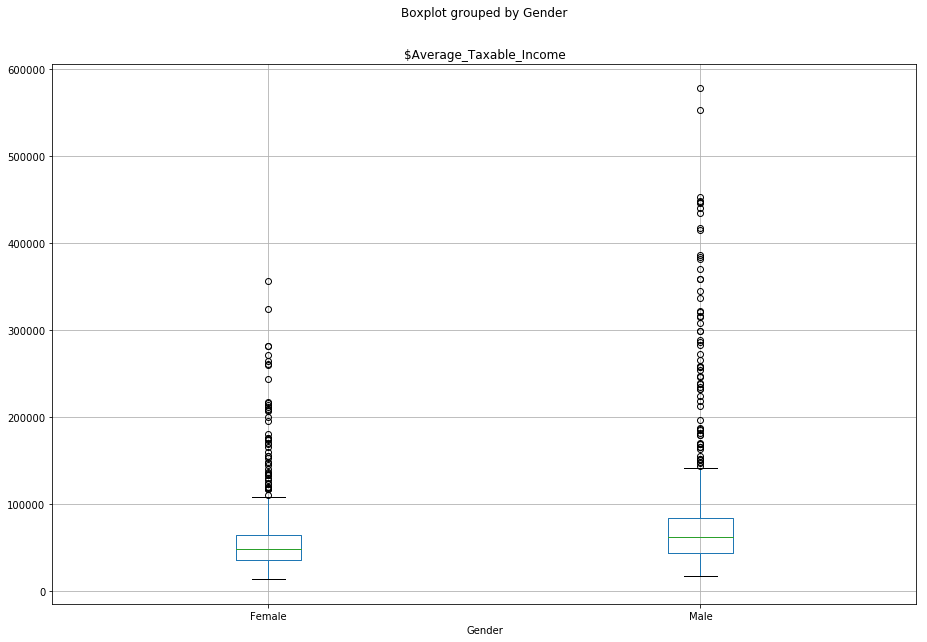

In [24]:
plt.rcParams["figure.figsize"] = (15,10)
df1.boxplot(column='$Average_Taxable_Income', by = 'Gender')

The above boxplot shows the range of values of Average Taxable Income for Men and Women in Australia.The boxplot for Men has
a higher median than Women's boxplot and is skewed to the right indicating positive skewness. Men's boxpot has more outliers 
and the dispersion of values of taxable income is higher. This indicates that for quite a lot of professions, Men are getting
higher salaries than women in the same profession. The maximum value of Men's boxplot is around 550k while that of Women's
boxplot outlier is 370k

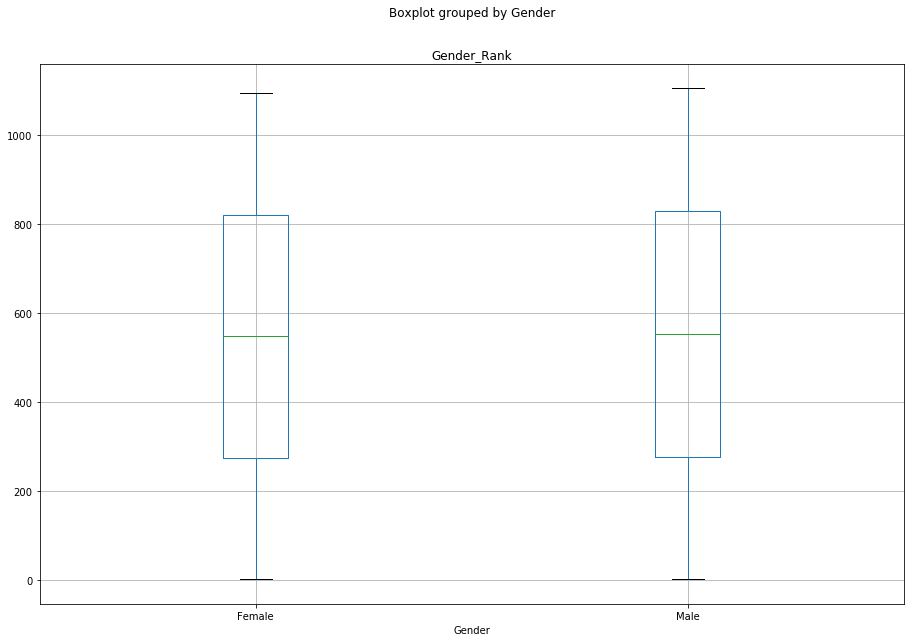

In [25]:
plt.rcParams["figure.figsize"] = (15,10)
df1.boxplot(column='Gender_Rank', by = 'Gender')

The above boxplot shows the variation in the ranks of Occupation for both Men and Women. Top ranked professions are Neurosurgery,
Opthalmalogy,Internal Medicine and Judge Law. The ranks start from the top ranked and the highest paid occupation  at 1 and then increase in descending order.
The above boxplot shows that there is an equal proportion of ranking distribution between Men and Women, suggesting the fact
that both Men and Women are currently present in all the mentioned occupations

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000245BEB50710>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000245BEE23C50>], dtype=object)

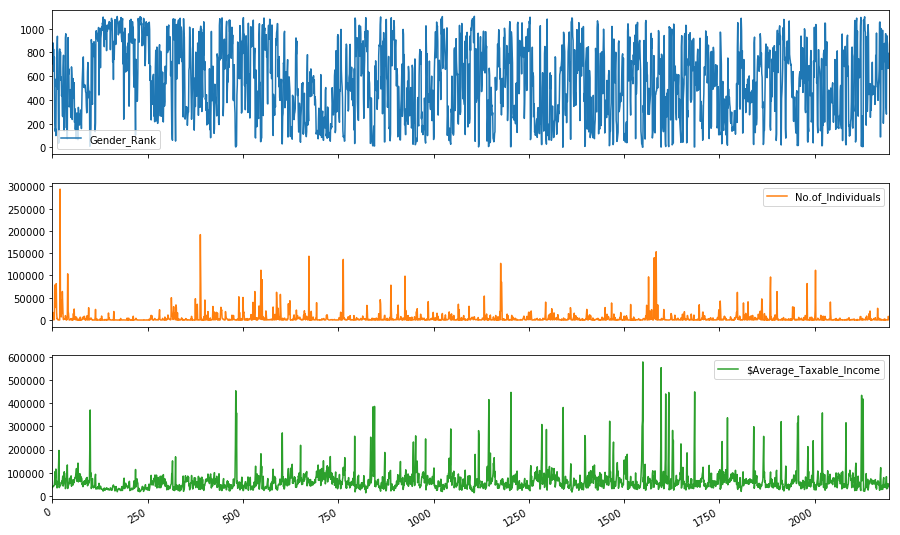

In [26]:
plt.figure()
df1.plot(subplots=True)


The above sub plots show the variation in Gender Ranks by occupation,No.of Individuals in each occupation and the Average Taxable Income.
The plots indicate that there is a huge variation in the Taxable Income because every profession is paid on a different scale
with respect to the skills and capabilities of an individual.Also, No.of individuals vary in different professions, some professions
like Administration jobs have a large no. of individuals while professions like Neurosurgery have a small no. of individuals.


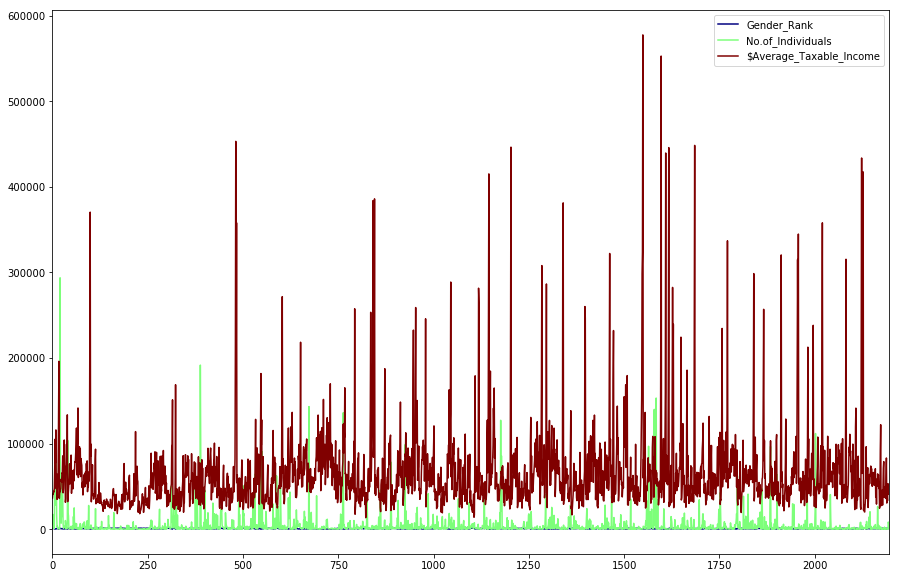

In [27]:
df1.plot(colormap='jet')

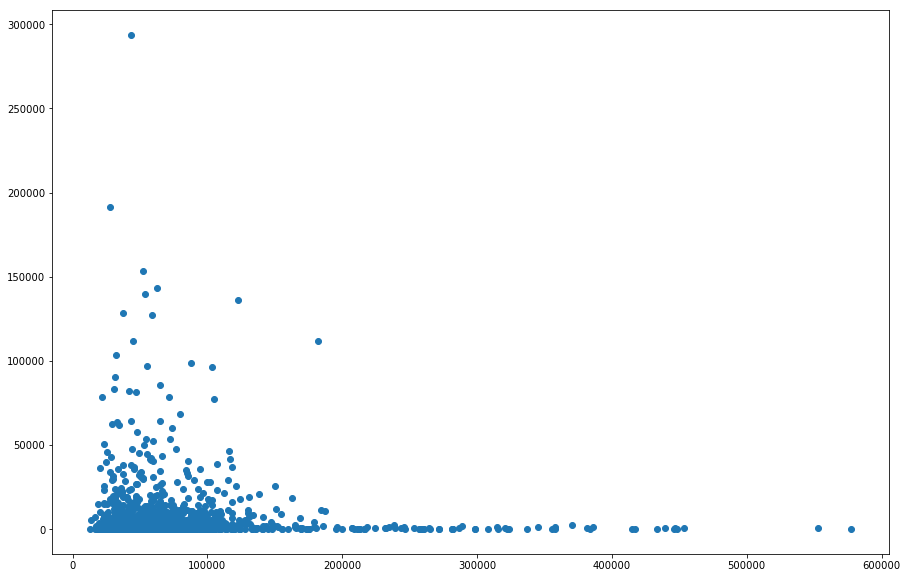

In [28]:
plt.scatter(df1['$Average_Taxable_Income'], df1['No.of_Individuals'])
plt.show() 

In [29]:
df1.groupby(['Gender']).describe()

$Average_Taxable_Income                                                \
                         count          mean           std      min      25%   
Gender                                                                         
Female                  1093.0  56109.103385  35284.106646  13307.0  34938.0   
Male                    1104.0  75151.863225  61645.548168  16490.0  44053.5   

                                    Gender_Rank           ...             \
            50%       75%       max       count   mean    ...        75%   
Gender                                                    ...              
Female  48511.0  64567.00  355844.0      1093.0  547.0    ...     820.00   
Male    61591.5  83517.75  577674.0      1104.0  552.5    ...     828.25   

               No.of_Individuals                                          \
           max             count         mean           std  min     25%   
Gender                                                                     
Female  1093.0            1093.0  4497.581885  16407.869661  3.0  111.00   
Male    1104.0            1104.0  4867.989130  12542.587357  3.0  341.75   

                                   
           50%      75%       max  
Gender                             
Female   502.0  2148.00  293738.0  
Male    1206.0  3634.25  143209.0  

[2 rows x 24 columns]

In [30]:
df1.mean()

Gender_Rank                  549.763769
No.of_Individuals           4683.712790
$Average_Taxable_Income    65678.155212
dtype: float64

The mean values show that an Average Taxable Income in Australia is $65,678. Average no.of individuals in a particular occupation
is 4,683

In [31]:
df1.median()

Gender_Rank                  550.0
No.of_Individuals            798.0
$Average_Taxable_Income    53850.0
dtype: float64

In [32]:
df1.sort_values('$Average_Taxable_Income',ascending=False).head(15)

,Gender_Rank,Occupation,Gender,No.of_Individuals,$Average_Taxable_Income
1549,1,Neurosurgeon,Male,142,577674
1597,2,Ophthalmologist,Male,423,552947
481,3,Cardiologist,Male,651,453253
1685,4,Plastic and reconstructive surgeon,Male,237,448530
1203,5,Gynaecologist Obstetrician,Male,641,446507
1617,6,Otorhinolaryngologist,Male,85,445939
1609,7,Orthopaedic surgeon,Male,805,439629
2123,8,Urologist,Male,254,433792
2127,9,Vascular surgeon,Male,99,417524
1145,10,Gastroenterologist,Male,294,415192


Sorting the values of Average Taxable Income in descending order yields the results in the above output. We can see medical
related professions like Neurosurgery, Opthalmology, Cardology and general surgery are top highest paid professions for Men in
Australia. Similar professions are paying Women less than Men in Australia, thereby confirming our main claim that Australia's
Top 50 jobs pay Men more than Women.
However, in the documentation on the github read me file, we will analyze the Rebuttal or a contradiction to our original claim by incorporating data from another source and merging that data with the existing dataset as shown below in this Jupyter Notebook


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2197 entries, 0 to 2196
Data columns (total 5 columns):
Gender_Rank                2197 non-null int64
Occupation                 2197 non-null object
Gender                     2197 non-null object
No.of_Individuals          2197 non-null int64
$Average_Taxable_Income    2197 non-null int64
dtypes: int64(3), object(2)
memory usage: 85.9+ KB


In [34]:
df1.to_excel('AusGenderPayGap.xlsx', index=False)

# For the Rebuttal of the Original Claim, that, Australia's Top 50 jobs are paying Men more than Women, we selected datasets on Labaor Force Participation as well as Full-Time vs Part-Time Participation of Men & Women

Source : http://stats.oecd.org/

In [9]:
df2 = pd.read_csv('AusLFS.Rebuttal.csv',encoding='latin-1') # For Total Labor Force Participation of Men and Women

In [10]:
df3 = pd.read_csv('AusFTLFP_Rebuttal.csv',encoding='latin-1') # For Full Time Labor Force Participation of Men and Women

In [11]:
df2.head()

,Country,Sex,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,Men,82.326517,82.184277,82.150898,81.968874,82.013330,82.617600,82.744396,82.965229,83.044819,82.612073,82.897626,82.842008,82.482942,82.391038,82.133287,82.702119,82.322065
1,NaN,Women,65.258794,65.937971,66.156331,67.021321,66.737111,68.190144,68.871148,69.424565,69.955726,70.147904,69.971300,70.454033,70.391816,70.450406,70.532562,71.232197,71.598317
2,NaN,All persons,73.793598,74.056300,74.148595,74.488849,74.369070,75.397418,75.802756,76.192719,76.503490,76.385437,76.435331,76.643571,76.431876,76.411465,76.317260,76.946775,76.938387
3,Austria,Men,79.890792,79.305733,79.709097,79.858714,77.354367,78.034984,78.878727,79.962903,80.005483,79.996399,80.018077,79.909827,80.239344,80.416386,79.997969,80.122360,80.703290
4,NaN,Women,61.778591,62.256809,63.672772,64.288529,63.503815,64.904287,65.962187,67.089888,67.837260,68.738217,68.899415,69.267765,70.049159,70.651463,70.804432,70.901721,71.684743


In [12]:
df3.head()

,Country,Sex,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Australia,Men,87.176088,86.079665,85.516592,85.501107,85.353421,85.333725,84.920492,85.037734,85.099067,83.889238,83.495533,83.822759,83.823291,83.148712,82.713938,82.350051,81.348125
1,NaN,Women,56.514426,55.609354,54.508768,54.503733,54.816153,54.554263,55.002300,55.452376,55.630533,54.734598,54.251150,54.426512,54.427425,54.056010,53.687770,53.590476,53.290677
2,NaN,All persons,73.661507,72.537492,71.721579,71.631787,71.738243,71.510115,71.430547,71.706208,71.778895,70.597272,70.226992,70.439954,70.394981,69.812853,69.380832,69.082774,68.335339
3,Austria,Men,95.973540,95.555720,95.321149,95.309531,95.154363,93.808531,93.443961,92.805555,91.824685,91.158777,90.827020,91.084233,90.839269,89.711238,89.060179,88.814414,88.178352
4,NaN,Women,67.661996,65.656731,64.671967,64.002438,62.415773,60.527641,59.604502,58.758209,58.414208,56.887198,56.198274,55.912365,54.944804,54.390562,53.108431,52.591426,52.307770


# Selecting only the data of Australia from the datasets

In [13]:
df4 = df2.iloc[0:2,[1,12,13,14,15,16,17,18]]

In [14]:
print(df4)

     Sex       2010       2011       2012       2013       2014       2015  \
0    Men  82.897626  82.842008  82.482942  82.391038  82.133287  82.702119   
1  Women  69.971300  70.454033  70.391816  70.450406  70.532562  71.232197   

        2016  
0  82.322065  
1  71.598317  


The above dataframe shows the Australia's total labor force participation by Men and Women. We can see in 2016 it was 82.7 % and 71.23 % for Men and Women respectively

In [15]:
df5 = df3.iloc[0:2,[1,12,13,14,15,16,17,18]]

In [16]:
print(df5)

     Sex       2010       2011       2012       2013       2014       2015  \
0    Men  83.495533  83.822759  83.823291  83.148712  82.713938  82.350051   
1  Women  54.251150  54.426512  54.427425  54.056010  53.687770  53.590476   

        2016  
0  81.348125  
1  53.290677  


The above dataframe shows the Australia's full time labor force participation by Men and Women. We can see in 2016 it was 82.35%
and much lesser 53.59% for Men and Women respectively. This is an important argument in our rebuttal towards the claim that 
Men are significantly paid more than Women in Australia. The reason that Men are commanding higher salaries is that Women take
less part in full time labor force and Women tend to work more part time shifts in Australia

# Merging our dataframes in a single dataframe

In [103]:
result = pd.concat([df1, df4,df5], axis=1, ignore_index=False)

In [104]:
result.head()

,Gender_Rank,Occupation,Gender,No.of_Individuals,$Average_Taxable_Income,Sex,2010,2011,2012,2013,...,2015,2016,Sex,2010,2011,2012,2013,2014,2015,2016
0,795,Abattoir process worker Meat process worker Me...,Female,5961,36359,Men,82.897626,82.842008,82.482942,82.391038,...,82.702119,82.322065,Men,83.495533,83.822759,83.823291,83.148712,82.713938,82.350051,81.348125
1,881,Abattoir process worker Meat process worker Me...,Male,17241,40954,Women,69.971300,70.454033,70.391816,70.450406,...,71.232197,71.598317,Women,54.251150,54.426512,54.427425,54.056010,53.687770,53.590476,53.290677
2,699,Aboriginal and Torres Strait Islander educatio...,Female,1386,40926,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,828,Aboriginal and Torres Strait Islander educatio...,Male,636,44077,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,641,Aboriginal and Torres Strait Islander health l...,Female,1878,43545,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Filling out the Missing and Null Values

In [106]:
result.fillna(0).head()

,Gender_Rank,Occupation,Gender,No.of_Individuals,$Average_Taxable_Income,Sex,2010,2011,2012,2013,...,2015,2016,Sex,2010,2011,2012,2013,2014,2015,2016
0,795,Abattoir process worker Meat process worker Me...,Female,5961,36359,Men,82.897626,82.842008,82.482942,82.391038,...,82.702119,82.322065,Men,83.495533,83.822759,83.823291,83.148712,82.713938,82.350051,81.348125
1,881,Abattoir process worker Meat process worker Me...,Male,17241,40954,Women,69.971300,70.454033,70.391816,70.450406,...,71.232197,71.598317,Women,54.251150,54.426512,54.427425,54.056010,53.687770,53.590476,53.290677
2,699,Aboriginal and Torres Strait Islander educatio...,Female,1386,40926,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,828,Aboriginal and Torres Strait Islander educatio...,Male,636,44077,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,641,Aboriginal and Torres Strait Islander health l...,Female,1878,43545,0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# Writing our final dataframe to an Excel File

In [109]:
result.to_excel('AusGenderPayGap1.xlsx')